In [1]:
import sys
sys.path.insert(1, 'Functions')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from fitness_funs_non_dim import *
from group_w_pop_funs import *
from scipy.optimize import fsolve
from sim_graph_funs import *
from scipy.integrate import odeint, solve_ivp

# Type I

In [3]:
H=0
x_max = 10
d=3
params_pop1_typeI = dict(η1 = 0.2, η2 = 0.4, A1 = 0.5, β1 = 10, β2 = 1, H1=H, H2=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, ξ = 2, d = d,
                 Tx = .01, r = 0, γ = 0, pop_process = True)
P_reg = 3; N1_reg = 0.5; N2_reg = 0.5
F_of_x_vec = np.zeros(x_max)
x=1 # everyone initially solitary
F_of_x_vec[x-1] = P_reg/x
initialstate = [P_reg, N1_reg, N2_reg, *F_of_x_vec];

In [4]:
#full_model_no_P(initialstate[1:],params_pop1_typeI)

out, infodict, ier, mesg = fsolve(func = full_model_no_P, x0 = [initialstate[1:]], 
                                  args = (params_pop1_typeI), full_output = 1)
F_eq = out[2:]
P_eq = np.sum(np.arange(1,11,1)*F_eq); 
N1_eq = out[0]
N2_eq = out[1]
mean_x_eq = mean_group_size_membership(F_eq,10,P_eq)

In [5]:
N1_eq, N2_eq, F_eq, P_eq, mean_x_eq = get_equilibrium(params_pop1_typeI.copy(), P_0 = 3)

In [245]:
initialstate = [P_reg, N1_reg, N2_reg, *F_of_x_vec]; 
t_f=3000  
out2 = solve_ivp(full_model, [0, t_f], initialstate, method="LSODA",
                args=(True,params_pop1_typeI.copy()))
T, N1, N2, P, mean_x = get_results(out2, x_max)


(0.0, 5.0)

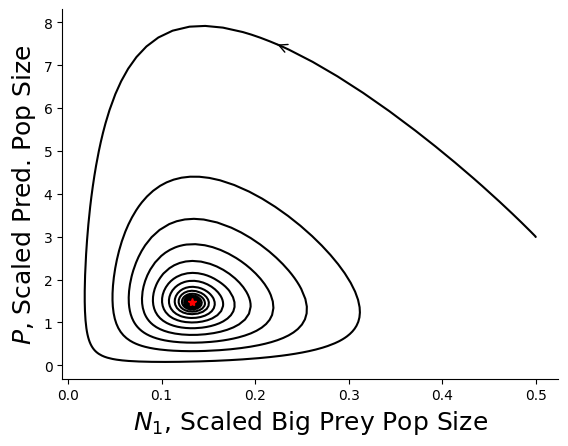

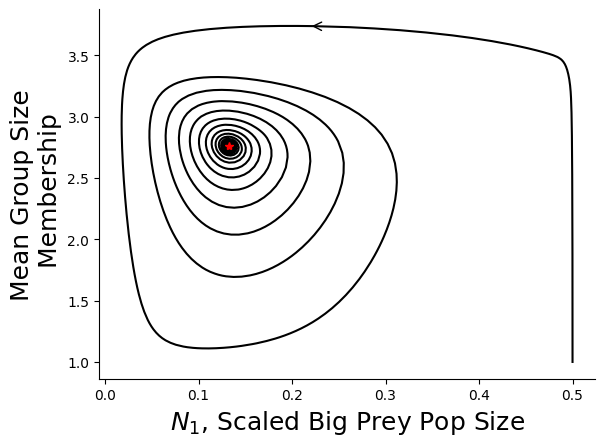

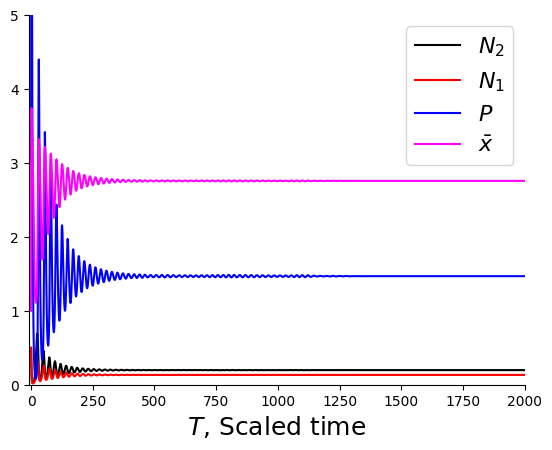

In [268]:
fig, ax = plot_x_vs_y(N1,P,N1lab,Plab,[90])
plt.plot(N1_eq, P_eq, 'r*')

fig, ax = plot_x_vs_y(N1,mean_x,N1lab,mean_x_lab,[90])
plt.plot(N1_eq, mean_x_eq, 'r*')

fig, ax = plot_all(T,N1,N2,P,mean_x, xlim = [-10, 2000])
ax.set_ylim([0,5])

3000.0
3000.0


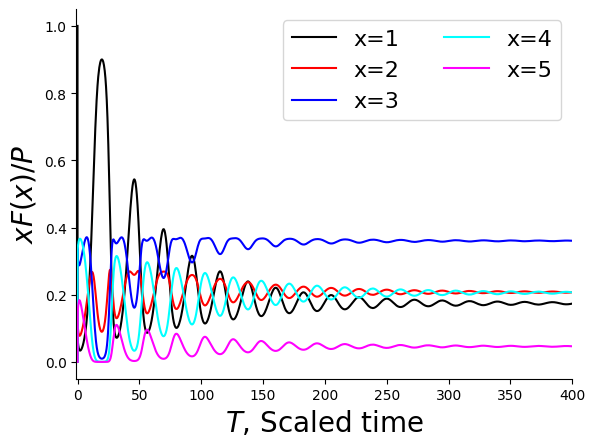

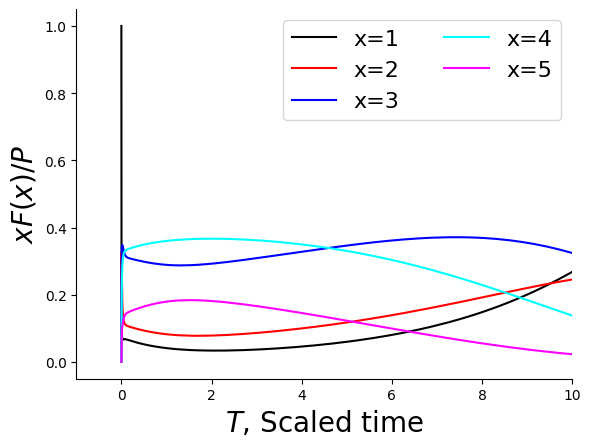

In [145]:
F_of_x_vec = out2.y[3:]
fig, ax = plt.subplots(1,1)
fig, ax = plot_portion_x(ax, out2, x_max, xlim = [-1,400])
ax.legend(fontsize = 16, ncol=2)
fig, ax = plt.subplots(1,1)
fig, ax = plot_portion_x(ax, out2, x_max, xlim = [-1,10])
ax.legend(fontsize = 16, ncol=2)